## 房价预测

### 题目说明
从给定的房屋基本信息以及房屋销售信息等，建立一个回归模型预测房屋的销售价格。


### 数据说明
数据主要包括2014年5月至2015年5月美国King County的房屋销售价格以及房屋的基本信息。 数据分为训练数据和测试数据，分别保存在kc_train.csv和kc_test.csv两个文件中。 其中训练数据主要包括10000条记录，


14个字段，主要字段说明如下： 第一列“销售日期”：2014年5月到2015年5月房屋出售时的日期 第二列“销售价格”：房屋交易价格，单位为美元，是目标预测值 第三列“卧室数”：房屋中的卧室数目 第四列“浴室数”：房屋中的浴室数目 第五列“房屋面积”：房屋里的生活面积 第六列“停车面积”：停车坪的面积 第七列“楼层数”：房屋的楼层数 第八列“房屋评分”：King County房屋评分系统对房屋的总体评分 第九列“建筑面积”：除了地下室之外的房屋建筑面积 第十列“地下室面积”：地下室的面积 第十一列“建筑年份”：房屋建成的年份 第十二列“修复年份”：房屋上次修复的年份 第十三列"纬度"：房屋所在纬度 第十四列“经度”：房屋所在经度

测试数据主要包括3000条记录，13个字段，跟训练数据的不同是测试数据并不包括房屋销售价格，学员需要通过由训练数据所建立的模型以及所给的测试数据，得出测试数据相应的房屋销售价格预测值。

### 步骤

1. 选择合适的模型，对模型的好坏进行评估和选择。
2. 对缺失的值进行补齐操作，可以使用均值的方式补齐数据，使得准确度更高。
3. 数据的取值一般跟属性有关系，但世界万物的属性是很多的，有些值小，但不代表不重要，所有为了提高预测的准确度，统一数据维度进行计算，方法有特征缩放和归一法等。
4. 数据处理好之后就可以进行调用模型库进行训练了。
5. 使用测试数据进行目标函数预测输出，观察结果是否符合预期。或者通过画出对比函数进行结果线条对比。


### 环境配置

python3.5

numpy库

pandas库

matplotlib库进行画图

seaborn库

sklearn库


In [3]:
import os

import pandas as pd  
import numpy as np   
#设定随机数种子
np.random.seed(1)

#使用matplotlib库画图
import matplotlib
import matplotlib.pyplot as plt
import seaborn
import csv
from sklearn import datasets

### 数据处理
首先先读取数据，查看数据是否存在缺失值，然后进行特征缩放统一数据维度

In [7]:
#读取数据
train_data = pd.read_csv("./美国KingCounty房价预测训练赛/kc_train.csv")
test_data = pd.read_csv("./美国KingCounty房价预测训练赛/kc_test.csv")



In [30]:
# 查看5行数据
train_data.head()
#查看是否有缺失值
# train_data.info()
# print("原始数据data", train_data.shape,type(train_data))  #原始数据的结构
# 数据描述：每列的元素数、均值、标准差、最小值、25%、50%、75%分位数和最大值
# print(train_data.describe()) 

,20150302,545000,3,2.25,1670,6240,1,8,1240,430,1974,0,47.6413,-122.113
0,20150211,785000,4,2.50,3300,10514,2.0,10,3300,0,1984,0,47.6323,-122.036
1,20150107,765000,3,3.25,3190,5283,2.0,9,3190,0,2007,0,47.5534,-122.002
2,20141103,720000,5,2.50,2900,9525,2.0,9,2900,0,1989,0,47.5442,-122.138
3,20140603,449500,5,2.75,2040,7488,1.0,7,1200,840,1969,0,47.7289,-122.172
4,20150506,248500,2,1.00,780,10064,1.0,7,780,0,1958,0,47.4913,-122.318


能够看到第二列是销售价格，而我们要预测的就是销售价格，所以在训练过程中是不需要销售价格的，把第二列删除掉,并把第二列的数据单独保存下来。

In [38]:

target = train_data.iloc[:,1]
train_data.drop(train_data.columns[[1]],axis='columns',inplace=True)

In [39]:
train_data.head()

,20150302,3,2.25,1670,6240,1,8,1240,430,1974,0,47.6413,-122.113
0,20150211,4,2.50,3300,10514,2.0,10,3300,0,1984,0,47.6323,-122.036
1,20150107,3,3.25,3190,5283,2.0,9,3190,0,2007,0,47.5534,-122.002
2,20141103,5,2.50,2900,9525,2.0,9,2900,0,1989,0,47.5442,-122.138
3,20140603,5,2.75,2040,7488,1.0,7,1200,840,1969,0,47.7289,-122.172
4,20150506,2,1.00,780,10064,1.0,7,780,0,1958,0,47.4913,-122.318


In [40]:
#特征缩放
from sklearn.preprocessing import MinMaxScaler
minmax_scalar = MinMaxScaler()
minmax_scalar.fit(train_data)#进行内部拟合，内部参数会发生变化
scalar_train_data = minmax_scalar.transform(train_data)
scalar_train_data = pd.DataFrame(scalar_train_data,columns=train_data.columns)

In [41]:
# 测试数据的缩放
mm_test = MinMaxScaler()
mm_test.fit(test_data)
scalar_test_data = mm_test.transform(test_data)
scalar_test_data = pd.DataFrame(scalar_test_data,columns=test_data.columns)

### 模型训练
使用sklearn库的线性回归函数进行调用训练。梯度下降法获得误差最小值。最后使用均方误差法来评价模型的好坏程度，并画图进行比较。

In [43]:
#选择基于梯度下降的线性回归模型
from sklearn.linear_model import LinearRegression
LR_reg = LinearRegression()
# 进行拟合
LR_reg.fit(scalar_train_data,target)





LinearRegression()

In [49]:
#使用均方误差用于评价模型好坏
from sklearn.metrics import mean_squared_error
#输入数据进行预测得到结果
preds = LR_reg.predict(scalar_train_data)
#使用均方误差来评价模型好坏，可以输出mse进行查看评价值
mse = mean_squared_error(preds,target)
print(mse)

48743886073.78829


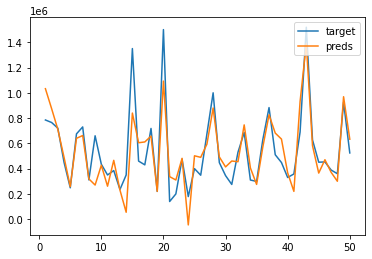

In [48]:
#绘图进行比较
plt.figure()
nums=50
x = np.arange(1,nums+1)
plt.plot(x,target[:nums],label='target')
plt.plot(x,preds[:nums],label='preds')
plt.legend(loc="upper right")
plt.show()


In [46]:
#输出测试数据
res = LR_reg.predict(scalar_test_data)
df_res = pd.DataFrame(res)
df_res.to_csv("./美国KingCounty房价预测训练赛/result.csv")

D:\ProgramData\Anaconda3\envs\gobigger\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- -122.322
- 1.1
- 1938
- 1994
- 2
- ...
Feature names seen at fit time, yet now missing:
- -122.113
- 1240
- 1670
- 1974
- 2.25
- ...

  warnings.warn(message, FutureWarning)
